<a href="https://colab.research.google.com/github/GODHYEONJU/MS-AI-School-/blob/main/4_14_PY_ComputerVision_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
##computer vision - image analysis
#http에 요청 후 정보 추출
import requests
#이미지 주소를 byte type의 데이터로 바꿔 읽어줌
from io import BytesIO
#이미지 처리를 위해 PIL이라는 외부 패키지 설치
from PIL import Image 

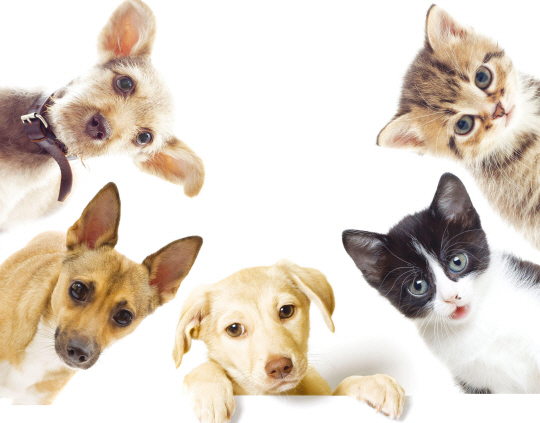

In [101]:
image_url = 'https://newsimg.sedaily.com/2017/11/08/1ONI1MU5JU_1.jpg'
# response = requests.get(image_url) #request.get:이미지 주소를 사용하여 이미지 데이터 요청보냄. 그리고 response 객체로 응답 받음.
# img = BytesIO(response.content) #byte타입으로 이미지를 텍스트말고 이미지로 가져오기 위해 .content 사용
# image = Image.open(img) #드디어 이미지를 불러낼 수 있음.
# 위 3줄을 하나로 통합
image = Image.open(BytesIO(requests.get(image_url).content))
image #이미지 호출!

In [102]:
#필요한 값들을 준비.
key = 'cc0210ed90ce401e8155063ab2593e0a'
endpoint = 'https://labuser29custom-prediction.cognitiveservices.azure.com/'+ 'vision/v3.0/'
#endpoint : API 요청 보낼 서버의 주소

In [103]:
#computer vision API를 호출하기 위해 필요한 값들을 변수에 저장.
#객체 분석
analyze_endpoint = endpoint + 'analyze'
#객체 감지
detect_endpoint = endpoint + 'detect' 

In [104]:
#API 호출에 필요한 Header와 Parameter, 데이터 변수에 저장
#헤더에 키값 넣어줌.
header = {'Ocp-Apim-Subscription-key':key} 
#API 호출할때 필요한 파라미터 정의.
params = {'visualFeatures':'Categories,Description,Color'}
#API 호출할때 전달할데이터를 파라미터에 정의
data = {'url':image_url}

In [105]:
#외부요청
response = requests.post(analyze_endpoint,
                         headers = header,
                         params = params,
                         json = data)
#request.post : 지정 url에 post 요청 보냄..post는 서버의 데이터를 수정하는데 사용.
#request.get : 지정 url get 요청 보냄..get은 데이터를가져오는데 사용.


In [106]:
#Json 응답을 파이썬에서 다룰 수 있는 딕셔너리나 리스트와 같은 데이터 타입으로 변환하는 메소드.
#json은 requests모듈에서 제공하는 메소드 중 하나로, HTTP응답(response)객체의 내용을 JSON형식으로 디코딩하는 메소드.
result = response.json()
result

{'error': {'code': '401',
  'message': 'Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource.'}}